# BUSINESS UNDERSTANDING

### The business goal is to predict fuel efficiency of cars (measured by combination_mpg) based on other characteristics like engine size, number of cylinders, and car class. This will enable us to provide useful insights to the consumers and manufacturers on fuel efficiency. 

## PROBLEM STATEMENT

### Increased campaingns on climate change and enviromnental awareness as well as rising costs of fuel have led to consumers of motorized transport means and manufacturers take into consideration fuel efficiency as a huge factor when choosing and manufacturing their vehicles. Our data contains attributes such as city and highway miles per gallon,number of cylinders,type of transmission and type of fuel used. The relationship between the attributes which could provide useful insights on improving fuel efficiency is not known/ understood. This could prove to be useful to stakeholders in the automotive industry. 

## OBJECTIVE


### 1. To build a predictive model to use a car's attributes e.g fuel type, number of cylinders and engine displacement to estimate its fuel efficiency.
### 2. Identify trends in fuel efficiency across different car manufacturers.
### 3. Provide insight to help consumers in selecting vehicles of their preferred fuel efficiency

## RESEARCH QUESTIONS

### 1. How does fuel type affect fuel efficiency of a car?
### 2. How does type of transmission (manual/ automatic) influence the car's fuel efficiency?
### 3. Do specific manufacturers produce vehicles with a higher fuel efficiency?
### 4. Which car attribute has the heaviest impact on fuel efficiency?

## SUCCESS CRITERIA

### Success of the model will be measured by:
#### 1. Its accuracy in predicting combination mpg
#### 2. Clear identification of factors influencing fuel efficiency
#### 3. Model should be easily interpretable by stakeholders in automotive industry.

## LIMITATIONS AND ASSUMPTIONS

### Limitations
#### 1. The dataset does not account for all the factors that may influence fuel efficiency e.g traffic conditions, driving habits, state of the roads.
#### 2. Data includes models from 2014 to 2024. This may not account for older or future models
#### 3. There are missing values in the dataset

## Assumptions
#### 1. Dataset is assued to be of quality and representative of real world conditions
#### 2. Each car entry is assumed to be independent while in real life it may share some attributes with other models.

# Data preparation

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\user\Desktop\MoringaSch\MyNotebooks\car_data.csv')
df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


In [18]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [19]:
df.tail()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024
549,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,alpina b8 gran coupe,a,2024


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [21]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [22]:
df.isna()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#check for null values
df.isna().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [24]:
#Dropping null values
df = df.dropna(axis=0, how="any")

In [25]:
# Null values after dropping
df.isna().sum()


city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [26]:
#Check for and remove duplicates
df.duplicated().sum()

2

In [27]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## PLOTS

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

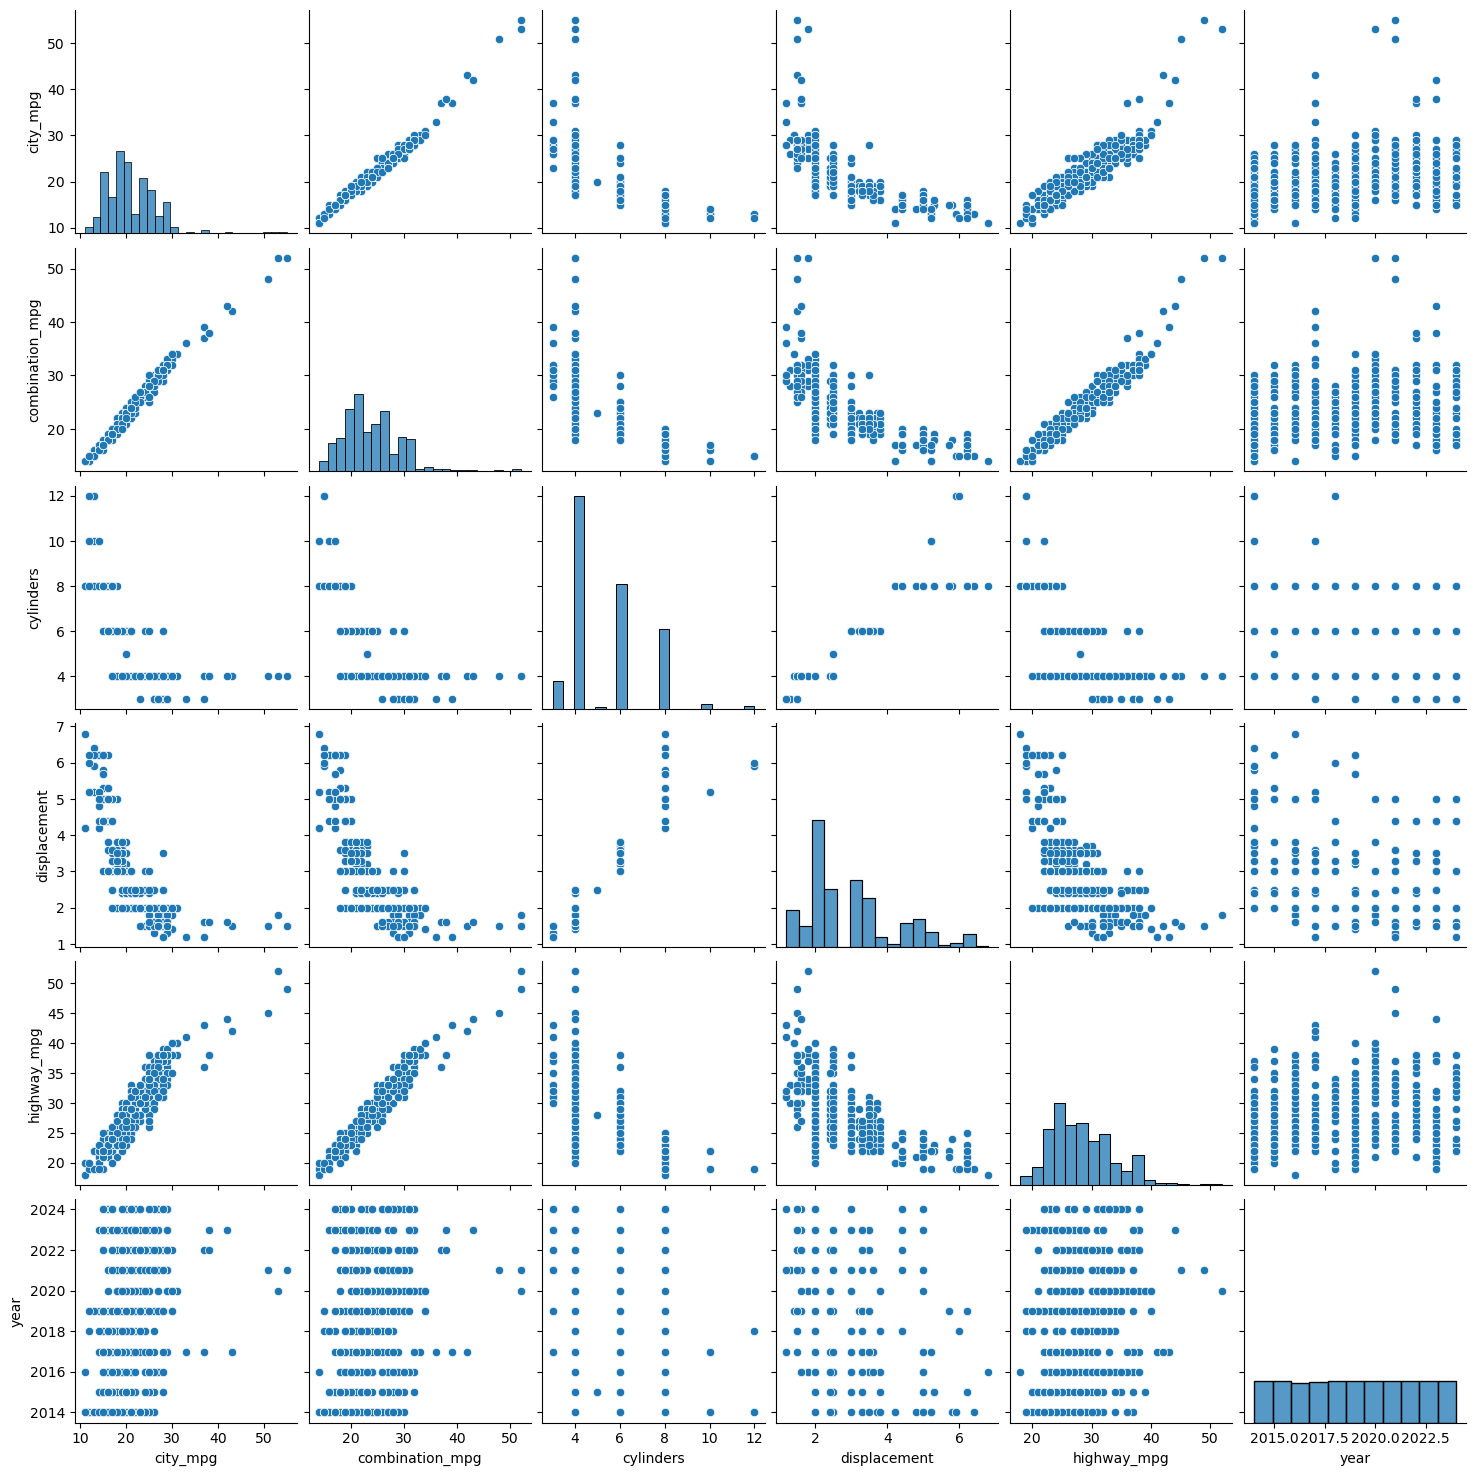

In [29]:
sns.pairplot(df)

## Histogram

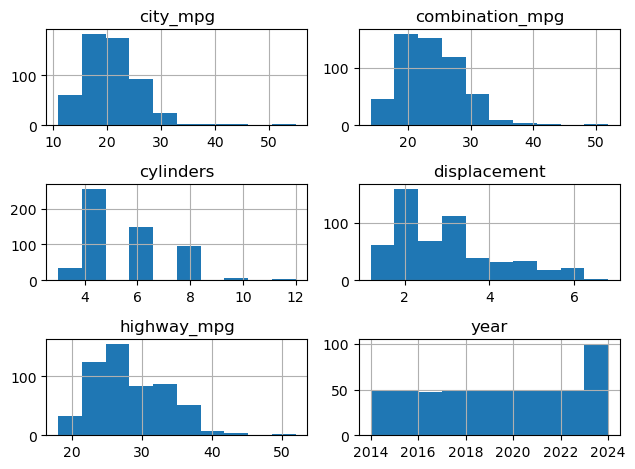

In [45]:
df.hist()
plt.tight_layout()

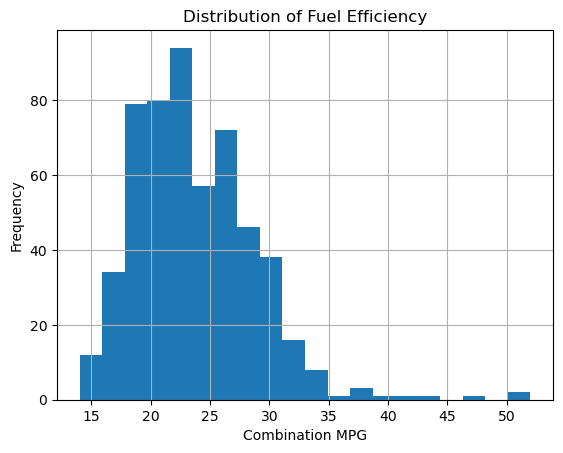

In [117]:
# Histogram of combined MPG
df['combination_mpg'].hist(bins=20)
plt.xlabel('Combination MPG')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency')
plt.show()

## Scatter plots

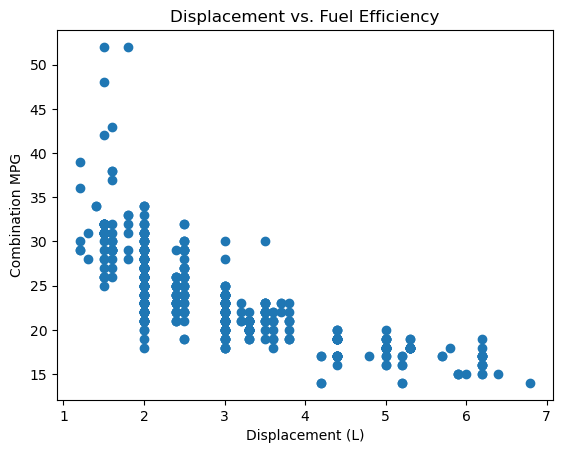

In [111]:
# Scatter plot of displacement vs. combination MPG
plt.scatter(df['displacement'], df['combination_mpg'])
plt.xlabel('Displacement (L)')
plt.ylabel('Combination MPG')
plt.title('Displacement vs. Fuel Efficiency')
plt.show()


## Box plots

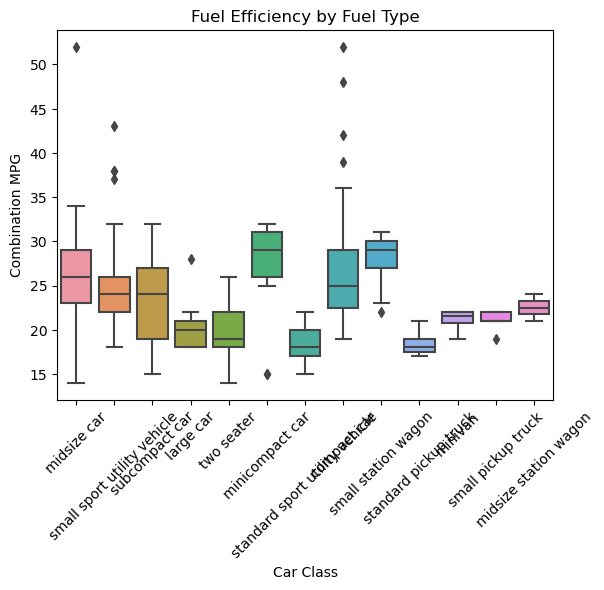

In [142]:
# Box plot of fuel efficiency by car class
sns.boxplot(x='class', y='combination_mpg', data=df)
plt.xlabel('Car Class')
plt.ylabel('Combination MPG')
plt.title('Fuel Efficiency by Fuel Type')
plt.xticks(rotation=45)
plt.show()


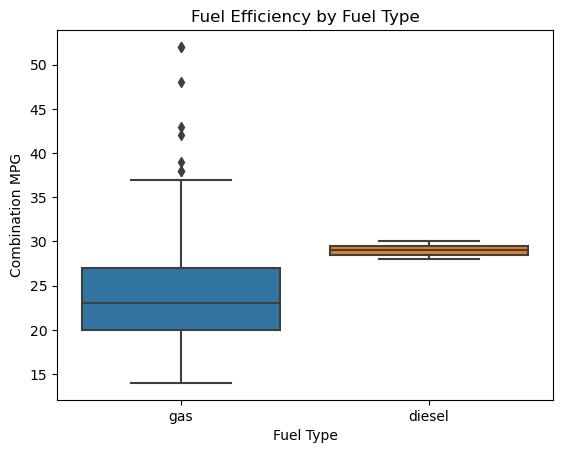

In [144]:
# Box plot of fuel efficiency by fuel type
sns.boxplot(x='fuel_type', y='combination_mpg', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Combination MPG')
plt.title('Fuel Efficiency by Fuel Type')
plt.show()
